- the notebook will analyse which maturities and strikes are listed at which point of time

In [1]:
@time include("../startup_script.jl");

elapsed time: 0.521042153 seconds (52397172 bytes allocated, 7.48% gc time)
elapsed time: 59.596634214 seconds (5419744236 bytes allocated, 70.53% gc time)
elapsed time: 0.80759861 seconds (112671656 bytes allocated, 54.45% gc time)
elapsed time: 78.007156239 seconds (5419744236 bytes allocated, 76.88% gc time)
elapsed time: 161.394314826 seconds (14792715520 bytes allocated, 65.67% gc time)


In [2]:
using TimeData
loadPlotting()

wstHist (generic function with 4 methods)

- join option data with price data to know if observation is call or not

In [3]:
obs = join(optPrices, opts, on = :ID);
head(obs)

,Date,ID,Price,Expiry,Strike,IsCall
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true
2,2006-07-04,c_20060721_4500,1232.6,2006-07-21,4500,true
3,2006-07-05,c_20060721_4500,1131.1,2006-07-21,4500,true
4,2006-07-06,c_20060721_4500,1197.0,2006-07-21,4500,true
5,2006-07-07,c_20060721_4500,1185.1,2006-07-21,4500,true
6,2006-07-10,c_20060721_4500,1210.3,2006-07-21,4500,true


- define function to count number of call and put observations

In [4]:
function countCallsAndPuts(x::AbstractDataFrame)
    nCalls = sum(x[:IsCall])
    nPuts = size(x, 1) - nCalls
    return [nCalls nPuts]
end

countCallsAndPuts (generic function with 1 method)

- count listed calls and puts and convert result to `Timematr` for plotting

In [5]:
optsPerDate = by(obs, :Date, x -> countCallsAndPuts(x))
names!(optsPerDate, [:Date, :nCalls, :nPuts])

optsPerDateTm = Timematr(optsPerDate[:, [2, 3]], convert(Array, optsPerDate[:Date]))

,idx,nCalls,nPuts
1,2006-07-03,455.0,481.0
2,2006-07-04,456.0,481.0
3,2006-07-05,457.0,481.0
4,2006-07-06,457.0,481.0
5,2006-07-07,457.0,481.0
6,2006-07-10,456.0,481.0
7,2006-07-11,456.0,482.0
8,2006-07-12,456.0,483.0
9,2006-07-13,457.0,486.0
10,2006-07-14,457.0,486.0


- visualize number of listed options per date

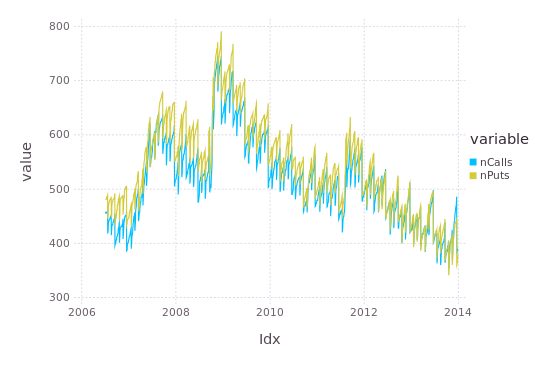

In [6]:
gdfPlot(optsPerDateTm)

- so it seems as if there are almost always more listed calls than listed puts
- during crisis the number of listed options has its peak
- maybe due to increase demand for hedging instruments

- count number of listed expiration dates per date

In [7]:
expiryPerDate = by(obs, :Date, x -> length(unique(x[:Expiry])))
names!(expiryPerDate, [:Date, :nExpiry])

expiryPerDateTm = Timematr(expiryPerDate[:, [2]], convert(Array, expiryPerDate[:Date]))

,idx,nExpiry
1,2006-07-03,11.0
2,2006-07-04,11.0
3,2006-07-05,11.0
4,2006-07-06,11.0
5,2006-07-07,11.0
6,2006-07-10,11.0
7,2006-07-11,11.0
8,2006-07-12,11.0
9,2006-07-13,12.0
10,2006-07-14,12.0


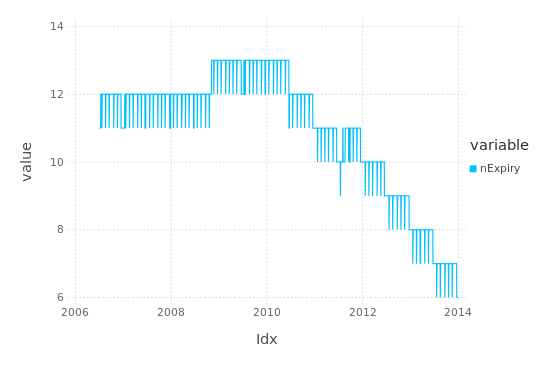

In [8]:
gdfPlot(expiryPerDateTm)

- get first observation per option

In [9]:
firstListData = join(optPrices, opts, on = :ID) |>
x -> join(x, cohortParams, on = [:Date, :Expiry])

head(firstListData)

,Date,ID,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137
2,2006-07-03,c_20060721_4600,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137
3,2006-07-03,c_20060721_4700,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137
4,2006-07-03,c_20060721_4800,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137
5,2006-07-03,c_20060721_4850,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137
6,2006-07-03,c_20060721_4900,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137


- define function to get only first observation

In [10]:
function getFirstListing(x::AbstractDataFrame)
    firstInd = indmin(x[:Date]) 
    return x[firstInd, [:Date, :Price, :Expiry, :Strike, :IsCall, :EONIA_matched, :Time_to_Maturity]]
end

getFirstListing (generic function with 1 method)

In [11]:
firstObs = by(firstListData, :ID, getFirstListing)
head(firstObs)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity
1,c_20060721_4500,2006-07-03,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137
2,c_20060721_4600,2006-07-03,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137
3,c_20060721_4700,2006-07-03,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137
4,c_20060721_4800,2006-07-03,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137
5,c_20060721_4850,2006-07-03,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137
6,c_20060721_4900,2006-07-03,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137


- add time to maturity in days

In [12]:
daysToMat = DataFrame(Days_to_Maturity = round(firstObs[:Time_to_Maturity] * 255))
firstObsExt = [firstObs daysToMat]
head(firstObsExt)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,Days_to_Maturity
1,c_20060721_4500,2006-07-03,1212.0,2006-07-21,4500,true,0.0283102283088403,0.0549019607843137,14.0
2,c_20060721_4600,2006-07-03,1112.3,2006-07-21,4600,true,0.0283102283088403,0.0549019607843137,14.0
3,c_20060721_4700,2006-07-03,1012.7,2006-07-21,4700,true,0.0283102283088403,0.0549019607843137,14.0
4,c_20060721_4800,2006-07-03,913.2,2006-07-21,4800,true,0.0283102283088403,0.0549019607843137,14.0
5,c_20060721_4850,2006-07-03,863.5,2006-07-21,4850,true,0.0283102283088403,0.0549019607843137,14.0
6,c_20060721_4900,2006-07-03,813.9,2006-07-21,4900,true,0.0283102283088403,0.0549019607843137,14.0


- remove options starting at sample begin because most likely we do not have their real first listing

In [13]:
cleanFirstObs = firstObsExt[!(firstObsExt[:Date] .== Date(2006,7,3)), :]
head(cleanFirstObs)

,ID,Date,Price,Expiry,Strike,IsCall,EONIA_matched,Time_to_Maturity,Days_to_Maturity
1,c_20060818_4500,2006-07-20,1057.5,2006-08-18,4500,true,0.0291086868858807,0.0823529411764706,21.0
2,c_20061020_4200,2006-10-04,1856.7,2006-10-20,4200,true,0.0322168040461548,0.0470588235294118,12.0
3,c_20061020_4250,2006-08-17,1607.3,2006-10-20,4250,true,0.0312314076945567,0.180392156862745,46.0
4,c_20061020_4500,2006-09-14,1423.6,2006-10-20,4500,true,0.031120566087487,0.101960784313725,26.0
5,c_20061020_4600,2006-09-18,1340.8,2006-10-20,4600,true,0.0311395009574763,0.0941176470588235,24.0
6,c_20061020_4700,2006-09-14,1224.8,2006-10-20,4700,true,0.031120566087487,0.101960784313725,26.0


- how many options are removed because their history is not fully observed?

In [14]:
[size(firstObsExt, 1) size(cleanFirstObs, 1)]

1x2 Array{Int64,2}:
 12917  11981

- show distribution of length of option listings

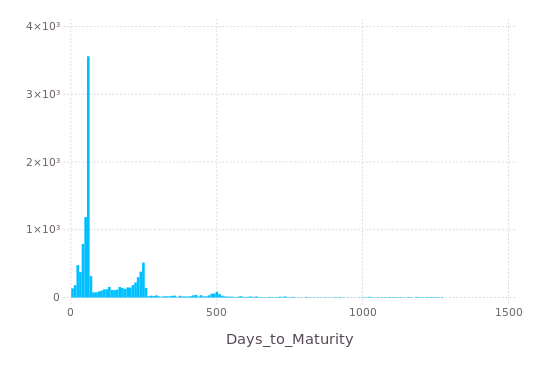

In [15]:
Gadfly.plot(cleanFirstObs, x="Days_to_Maturity", Gadfly.Geom.histogram)

- one peak is at approximately 1 year: many options are listed 1 year prior to maturity
- another earlier peak is at 50 to 60 days: maybe represents a quarter prior to maturity 

### Compose dataset for listing chart

In [16]:
listingChartData = join(optPrices, opts, on = :ID) |>
x -> join(x, daxVals, on = :Date)

head(listingChartData)

,Date,ID,Price,Expiry,Strike,IsCall,DAX
1,2006-07-03,c_20060721_4500,1212.0,2006-07-21,4500,true,5712.69
2,2006-07-03,c_20060721_4600,1112.3,2006-07-21,4600,true,5712.69
3,2006-07-03,c_20060721_4700,1012.7,2006-07-21,4700,true,5712.69
4,2006-07-03,c_20060721_4800,913.2,2006-07-21,4800,true,5712.69
5,2006-07-03,c_20060721_4850,863.5,2006-07-21,4850,true,5712.69
6,2006-07-03,c_20060721_4900,813.9,2006-07-21,4900,true,5712.69


In [17]:
writetable("../data/chart_data/listingData.csv", listingChartData)

### Session info

In [18]:
versioninfo()

Julia Version 0.3.6
Commit a05f87b* (2015-01-08 22:33 UTC)
Platform Info:
  System: Linux (x86_64-linux-gnu)
  CPU: Intel(R) Core(TM) i5-4210U CPU @ 1.70GHz
  WORD_SIZE: 64
  BLAS: libopenblas (DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas
  LIBM: libopenlibm
  LLVM: libLLVM-3.3


In [19]:
Pkg.status()

20 required packages:
 - DataArrays                    0.2.15
 - DataFrames                    0.6.6
 - Dates                         0.3.2
 - Debug                         0.1.3
 - Distributions                 0.7.3
 - Docile                        0.5.3
 - GLM                           0.4.6
 - Gadfly                        0.3.12
 - IJulia                        0.2.5
 - JuMP                          0.9.1
 - Lexicon                       0.1.10
 - MAT                           0.2.12
 - NLopt                         0.2.1
 - Plotly                        0.0.3+             master
 - Quandl                        0.4.1
 - RDatasets                     0.1.2
 - Requires                      0.1.2              master
 - Taro                          0.1.4
 - TimeSeries                    0.5.9
 - Winston                       0.11.10
58 additional packages:
 - ArrayViews                    0.6.2
 - AssetMgmt                     0.0.0-             master (unregistered)
 - BinDeps     